In [1]:
# 第二題
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
EuStockMarkets = pd.read_table('EuStockMarkets.csv',sep = ',')
EuStockMarkets.head()
DAX = EuStockMarkets.DAX
FTSE = EuStockMarkets.FTSE

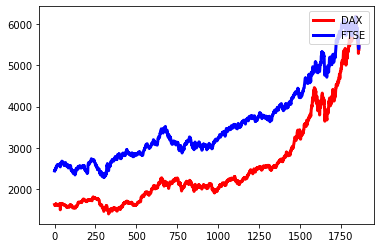

In [3]:
# 繪圖並設定線條顏色、寬度、圖例
line1, = plt.plot(DAX, color = 'red', linewidth = 3, label = 'DAX')             
line2, = plt.plot(FTSE, color = 'blue', linewidth = 3, label = 'FTSE')
plt.legend(handles = [line1, line2], loc='upper right')
plt.show()                           

In [4]:
# 第三題

In [5]:
EuStockMarkets = pd.read_table('EuStockMarkets.csv',sep = ',')
EuStockMarkets.head()

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7


In [6]:
DAX = EuStockMarkets.DAX
FTSE = EuStockMarkets.FTSE

In [7]:
retData = pd.concat([DAX,FTSE],axis = 1).astype(np.float)
retData = retData.dropna()
retData.head()

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,DAX,FTSE
0,1628.75,2443.6
1,1613.63,2460.2
2,1606.51,2448.2
3,1621.04,2470.4
4,1618.16,2484.7


In [8]:
# (a)
# 建構迴歸模型
model = sm.OLS(retData.DAX,sm.add_constant(retData.FTSE)).fit()

In [9]:
# 查詢迴歸模型結果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    DAX   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 3.604e+04
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:51:18   Log-Likelihood:                -12834.
No. Observations:                1860   AIC:                         2.567e+04
Df Residuals:                    1858   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1331.2374     21.092    -63.115      0.0

In [10]:
# (b)
# R-squared = 0.95 模型可以解釋95%的變異量
# p值為 0.000 < 0.05 接受信心水準為0.05的假設檢定
# 斜率的估計值為 1.0831，顯著不為0(其p值也為0，小於0.05的顯著性水平 )
# 根據以上結果可以得到以下模型:
# DAX = -1331.2374 + 1.0831 * FTSE + εi

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


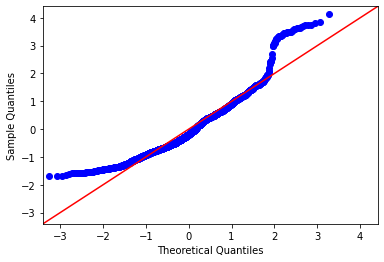

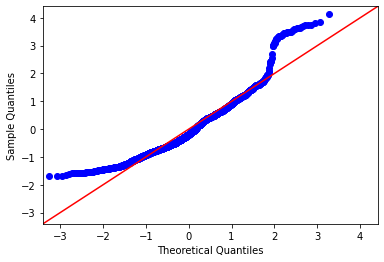

In [11]:
# (c)
import scipy.stats as stats
sm.qqplot(model.resid_pearson,
          stats.norm,line='45')

In [12]:
# 圖上大部分的點在直線上或在直線附近，大致可以推論數據滿足常態性的假設